In [11]:
import configparser
import os.path
from alpenglow.s3_image_source import S3ImageSource

path_format = '/phantom_2_7_2017/{stripe_id:06d}/{stripe_id:06d}_{version_id:05d}.tif'
stripe_ids = [0, 1, 2]
version_ids = [1, 256, 512, 768, 1024, 1280, 1536, 1800]

config_parser = configparser.ConfigParser()
config_parser.read_file(open(os.path.join(os.path.expanduser('~'), '.aws', 'credentials')))
config_parser.sections()

aws_access_key_id = config_parser.get('default', 'AWS_ACCESS_KEY_ID')
aws_secret_access_key = config_parser.get('default', 'AWS_SECRET_ACCESS_KEY')

image_source = S3ImageSource(path_format, stripe_ids, version_ids, aws_access_key_id, aws_secret_access_key, 'alpenglowoptics', 'https://s3.amazonaws.com')

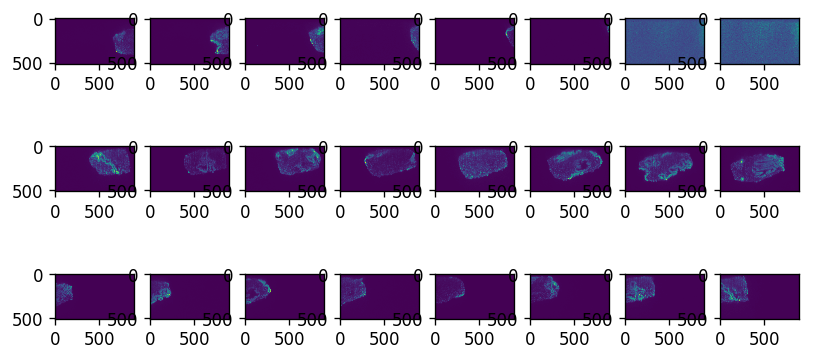

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 4), dpi=120)

version_count = image_source.version_count()
stripe_count = image_source.stripe_count()
for version_id in range(version_count):
    for stripe_id in range(stripe_count):
        ax = fig.add_subplot(stripe_count, version_count, 1 + version_id + version_count * stripe_id)
        ax.imshow(image_source.get_image(stripe_id, version_id))
plt.show()


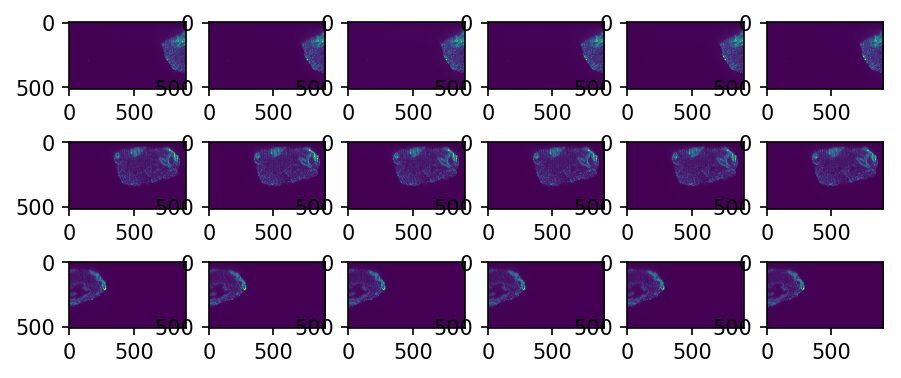

In [13]:
image_source2 = S3ImageSource(path_format, [0, 1, 2], [500, 501, 502, 503, 504, 505], aws_access_key_id, aws_secret_access_key, 'alpenglowoptics', 'https://s3.amazonaws.com')
fig2 = plt.figure(figsize=(7, 3), dpi=150)

version_count = image_source2.version_count()
stripe_count = image_source2.stripe_count()

for version_id in range(version_count):
    for stripe_id in range(stripe_count):
        ax = fig2.add_subplot(stripe_count, version_count, 1 + version_id + version_count * stripe_id)
        ax.imshow(image_source2.get_image(stripe_id, version_id))
plt.show()